<a href="https://colab.research.google.com/github/Stacy067/Data-Analysis-for-Python/blob/main/1_1_KRX_%EC%A0%84%EC%B2%B4_%EC%A2%85%EB%AA%A9%EB%B6%84%EC%84%9D_input_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 한국거래소(KRX) 전체 종목 분석
* Pandas cheat sheet 를 함께 보세요! : [Pandas_Cheat_Sheet.pdf](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

    
* Pandas를 통한 파일 저장과 불러오기
    * to_csv("파일명", index=False) : csv 파일로 저장하기
    * read_csv("파일명") : csv 파일 불러오기
    * shape를 통한 행과 열의 수 보기
    * head, tail, sample 을 통한 일부 데이터 가져오기
    
* DataFrame의 info(), describe() 등을 통한 요약과 기술통계 값 구하기
    * info()
    * describe()
    * nunique()
    * index
    * columns
    * values
    
* Pandas의  DataFrame과 Series의 이해
    * Series : 1차원 벡터구조
    * DataFrame : 2차원 행렬구조
    
* 색인하기
    * [컬럼]
    * .loc[행]
    * .loc[행, 열]
    * .loc[조건식, 열]
    
* DataFrame의 데이터 타입 이해하기
    * 날짜 데이터의 변환
    
* DataFrame 다루기
    * 열(column) 인덱싱
    * 행(index) 인덱싱
    * 행, 열 인덱싱
    * 정렬하기 : sort_values 사용하기
    * 조건식 사용하기

* 빈도수 구하기
    * 한 개의 변수 : series.value_counts()
    * 두 개의 변수 : pd.crosstab()

* groupby 와 pivot_table
    * 다양한 연산식의 사용


## 라이브러리 불러오기

In [ ]:
# 데이터 분석을 위해 pandas, 시각화를 위해 seaborn 불러오기
import pandas as pd
import numpy as np
import seaborn as sns #as는 별칭으로 사용 공식문서에서 사용

## 데이터셋 불러오기
<img src="https://pandas.pydata.org/docs/_images/02_io_readwrite.svg">

* FinanceDataReader 로 수집한 전체 종목 불러오기
    * 한국 주식 가격, 미국주식 가격, 지수, 환율, 암호화폐 가격, 종목 리스팅 등 금융 데이터 수집 라이브러리
    * [FinanceData/FinanceDataReader: Financial data reader](https://github.com/FinanceData/FinanceDataReader)
    * [FinanceDataReader 사용자 안내서 | FinanceData](https://financedata.github.io/posts/finance-data-reader-users-guide.html)
    * https://pandas-datareader.readthedocs.io/en/latest/readers/index.html


In [ ]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 한국거래소 전체 종목 데이터 URL
url = 'http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13'
print(url)

http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13


In [ ]:
pd.read_html(url)[0] #[0]으로 넣어서 index 형성, 첫번째 테이블을 가져옴

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,DL,210,기타 금융업,지주회사,1976-02-02,12월,전병욱,http://www.dlholdings.co.kr,서울특별시
1,DRB동일,4840,고무제품 제조업,"고무벨트(V벨트,콘베이어벨트,평벨트),프라스틱제품 제조,판매",1976-05-21,12월,류영식,http://drbworld.com,부산광역시
2,DSR,155660,1차 비철금속 제조업,합섬섬유로프,2013-05-15,12월,홍석빈,http://www.dsr.com,부산광역시
3,GS,78930,기타 금융업,지주회사/부동산 임대,2004-08-05,12월,"허태수, 홍순기 (각자 대표이사)",NaN,서울특별시
4,KG케미칼,1390,기초 화학물질 제조업,"콘크리트혼화제, 비료, 친환경농자재, 수처리제",1989-08-25,12월,"곽정현, 김재익",http://www.kgchem.co.kr,울산광역시
...,...,...,...,...,...,...,...,...,...
2502,코스텍시스템,169670,특수 목적용 기계 제조업,"반도체 웨이퍼 이송장비, 본딩장비",2022-01-21,12월,배준호,http://www.kosteks.com/,경기도
2503,타임기술,318660,소프트웨어 개발 및 공급업,"ILS(종합군수지원), IETM(전자식기술교범), CBT(전자식교보재), 기술번역",2021-06-24,12월,주양효,http://timett.co.kr,경상남도
2504,플럼라인생명과학,222670,자연과학 및 공학 연구개발업,"강아지암치료제,돼지DNA테라피",2015-07-28,12월,김앤토니경태,http://www.plsdna.com,서울특별시
2505,한국미라클피플사,331660,기타 화학제품 제조업,"은나노스텝, 닥터오렌지 등",2019-10-28,12월,이호경,http://www.kmpc.co.kr,경기도


In [ ]:
import FinanceDataReader as fdr

df = fdr.StockListing("KRX")
df.shape

(8084, 10)

In [ ]:
# ? : 도움말
# ?? : 소스코드
fdr.StockListing?

### 일부 데이터만 가져오기

{'회사명':'Name', '종목코드':'Symbol', '업종':'Sector', '주요제품':'Industry', 
                            '상장일':'ListingDate', '결산월':'SettleMonth',  '대표자명':'Representative', 
                            '홈페이지':'HomePage', '지역':'Region', }

In [ ]:
# head 로 위에 있는 데이터 일부만 가져옵니다.
df.head(3) #숫자 개수만큼 가져옴

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시


In [ ]:
# tail 로 아래 있는 데이터 일부만 가져옵니다.
df.tail()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
8079,435540,KOSPI,히어로즈 TDF2040액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8080,435550,KOSPI,히어로즈 TDF2050액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8081,419890,KOSPI,히어로즈 단기채권ESG액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8082,429870,KOSPI,히어로즈 리츠이지스액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8083,238490,KOSDAQ,힘스,특수 목적용 기계 제조업,"OLED Mask 인장기, OLED Mask 검사기 등",2017-07-20,12월,김주환,http://www.hims.co.kr,인천광역시


In [ ]:
# sample을 사용하면 랜덤하게 ()안의 갯수만큼 가져옵니다. 
# ()안에 값을 써주지 않으면 한 개만 가져옵니다.
df.sample(10)

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
6914,57H881,KOSPI,한국H881삼성전자콜,NaN,NaN,NaT,NaN,NaN,NaN,NaN
157,432850,KOSPI,HANARO 글로벌백신치료제MSCI,NaN,NaN,NaT,NaN,NaN,NaN,NaN
5576,179900,KOSDAQ,유티아이,전자부품 제조업,카메라 윈도우,2017-09-27,12월,박덕영,http://www.utikorea.com,충청남도
34,419650,KOSPI,ARIRANG 글로벌수소&차세대연료전지MV,NaN,NaN,NaT,NaN,NaN,NaN,NaN
5233,060540,KOSDAQ,에스에이티,"측정, 시험, 항해, 제어 및 기타 정밀기기 제조업; 광학기기 제외","교통관련장비(고정식축중기, 이동식축중기 등)",2006-11-28,12월,정성원,http://www.satech.co.kr,경기도
2328,186230,KOSDAQ,그린플러스,1차 비철금속 제조업,"첨단유리온실, 온실용자재설치공사, 알루미늄 압출/가공제품",2019-08-07,12월,박영환,http://www.greenplus.co.kr,충청남도
2414,317860,KONEX,노드메이슨,기타 화학제품 제조업,헉슬리/Huxley 화장품(스킨케어 스페셜/스킨케어베이직),2019-12-06,12월,구자풍,http://www.huxley.co.kr,서울특별시
6970,57H973,KOSPI,한국H973엘지전자콜,NaN,NaN,NaT,NaN,NaN,NaN,NaN
469,58H504,KOSPI,KBH504KOSPI200콜,NaN,NaN,NaT,NaN,NaN,NaN,NaN
474,58H509,KOSPI,KBH509KOSPI200풋,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [ ]:
# 결측치가 아닌 값에 대해 True, False 값
df["Sector"].notnull()

0        True
1        True
2        True
3        True
4        True
        ...  
8079    False
8080    False
8081    False
8082    False
8083     True
Name: Sector, Length: 8084, dtype: bool

In [ ]:
# boolean Indexing
# Sector(업종)이 결측치가 아닌 데이터 가져오기
df[df["Sector"].notnull()]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
8072,189980,KOSDAQ,흥국에프엔비,비알코올음료 및 얼음 제조업,"과일음료(에이드베이스, 스무디, 착즙쥬스 등)",2015-08-07,12월,"박철범, 오길영",http://www.hyungkuk.com,서울특별시
8073,000540,KOSPI,흥국화재,보험업,손해보험,1974-12-05,12월,임규준,http://www.insurance.co.kr,서울특별시
8076,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
8077,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호 (각자대표)",http://www.heerim.com,서울특별시


In [ ]:
# Sector(업종)이 결측치라면 아마도 금융상품일 것입니다.
df_sector_null = df[df["Sector"].isnull()]
df_sector_null

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
6,152100,KOSPI,ARIRANG 200,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7,295820,KOSPI,ARIRANG 200동일가중,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8,253150,KOSPI,ARIRANG 200선물레버리지,NaN,NaN,NaT,NaN,NaN,NaN,NaN
9,253160,KOSPI,ARIRANG 200선물인버스2X,NaN,NaN,NaT,NaN,NaN,NaN,NaN
10,395750,KOSPI,ARIRANG ESG가치주액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
8078,435530,KOSPI,히어로즈 TDF2030액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8079,435540,KOSPI,히어로즈 TDF2040액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8080,435550,KOSPI,히어로즈 TDF2050액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8081,419890,KOSPI,히어로즈 단기채권ESG액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [ ]:
(True + True + False)/3

0.6666666666666666

In [ ]:
df_sector_null.isnull()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
6,False,False,False,True,True,True,True,True,True,True
7,False,False,False,True,True,True,True,True,True,True
8,False,False,False,True,True,True,True,True,True,True
9,False,False,False,True,True,True,True,True,True,True
10,False,False,False,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...
8078,False,False,False,True,True,True,True,True,True,True
8079,False,False,False,True,True,True,True,True,True,True
8080,False,False,False,True,True,True,True,True,True,True
8081,False,False,False,True,True,True,True,True,True,True


In [ ]:
df_sector_null.isnull().mean() *100 # %의 결측치 

Symbol              0.0
Market              0.0
Name                0.0
Sector            100.0
Industry          100.0
ListingDate       100.0
SettleMonth       100.0
Representative    100.0
HomePage          100.0
Region            100.0
dtype: float64

In [ ]:
# 결측치인 컬럼을 삭제
# axis 0 ==> 행 1==>열
# 컬럼이 결측치인 것을 삭제
df_sector_null.dropna(axis=1)

,Symbol,Market,Name
6,152100,KOSPI,ARIRANG 200
7,295820,KOSPI,ARIRANG 200동일가중
8,253150,KOSPI,ARIRANG 200선물레버리지
9,253160,KOSPI,ARIRANG 200선물인버스2X
10,395750,KOSPI,ARIRANG ESG가치주액티브
...,...,...,...
8078,435530,KOSPI,히어로즈 TDF2030액티브
8079,435540,KOSPI,히어로즈 TDF2040액티브
8080,435550,KOSPI,히어로즈 TDF2050액티브
8081,419890,KOSPI,히어로즈 단기채권ESG액티브


In [ ]:
# np.nan은 결측치를 의미
# not a number 의 약자
# nat == not a timestamp 시간에 대한 결측치

## 데이터 요약하기

In [ ]:
# info 로 요약 데이터를 봅니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8084 entries, 0 to 8083
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Symbol          8084 non-null   object        
 1   Market          8084 non-null   object        
 2   Name            8084 non-null   object        
 3   Sector          2507 non-null   object        
 4   Industry        2491 non-null   object        
 5   ListingDate     2507 non-null   datetime64[ns]
 6   SettleMonth     2507 non-null   object        
 7   Representative  2507 non-null   object        
 8   HomePage        2351 non-null   object        
 9   Region          2507 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 694.7+ KB


In [ ]:
# describe 로 기술통계값을 봅니다.
df.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
count,8084,8084,8084,2507,2491,2507,2507,2507,2351,2507
unique,8084,3,8084,161,2332,1865,8,2388,2330,22
top,060310,KOSPI,3S,소프트웨어 개발 및 공급업,기업인수합병,1996-07-03 00:00:00,12월,-,http://www.poongsan.co.kr,서울특별시
freq,1,6380,1,152,30,8,2447,5,2,1021
first,NaN,NaN,NaN,NaN,NaN,1956-03-03 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2022-07-07 00:00:00,NaN,NaN,NaN,NaN


In [ ]:
# 중복을 제외한 unique 값의 갯수를 봅니다.
df.nunique()

Symbol            8084
Market               3
Name              8084
Sector             161
Industry          2332
ListingDate       1865
SettleMonth          8
Representative    2388
HomePage          2330
Region              22
dtype: int64

In [ ]:
df.dtypes

Symbol                    object
Market                    object
Name                      object
Sector                    object
Industry                  object
ListingDate       datetime64[ns]
SettleMonth               object
Representative            object
HomePage                  object
Region                    object
dtype: object

In [ ]:
# index 값 보기
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            8074, 8075, 8076, 8077, 8078, 8079, 8080, 8081, 8082, 8083],
           dtype='int64', length=8084)

In [ ]:
# 컬럼값 보기
df.columns

Index(['Symbol', 'Market', 'Name', 'Sector', 'Industry', 'ListingDate',
       'SettleMonth', 'Representative', 'HomePage', 'Region'],
      dtype='object')

In [ ]:
# 값만 보기
df.values

array([['060310', 'KOSDAQ', '3S', ..., '김세완', 'http://www.3sref.com',
        '서울특별시'],
       ['095570', 'KOSPI', 'AJ네트웍스', ..., '박대현, 손삼달',
        'http://www.ajnet.co.kr', '서울특별시'],
       ['006840', 'KOSPI', 'AK홀딩스', ..., '채형석, 이석주(각자 대표이사)',
        'http://www.aekyunggroup.co.kr', '서울특별시'],
       ...,
       ['419890', 'KOSPI', '히어로즈 단기채권ESG액티브', ..., nan, nan, nan],
       ['429870', 'KOSPI', '히어로즈 리츠이지스액티브', ..., nan, nan, nan],
       ['238490', 'KOSDAQ', '힘스', ..., '김주환', 'http://www.hims.co.kr',
        '인천광역시']], dtype=object)

## 데이터 색인하기

### Series
<img src="https://pandas.pydata.org/docs/_images/01_table_series.svg">

In [ ]:
type(1)

int

In [ ]:
type("1")

str

In [ ]:
type(1.0)

float

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df["Name"].dtype

dtype('O')

In [ ]:
# Name 컬럼 하나만 가져옵니다.
df["Name"]

0                    3S
1                AJ네트웍스
2                 AK홀딩스
3                APS홀딩스
4                 AP시스템
             ...       
8079    히어로즈 TDF2040액티브
8080    히어로즈 TDF2050액티브
8081    히어로즈 단기채권ESG액티브
8082      히어로즈 리츠이지스액티브
8083                 힘스
Name: Name, Length: 8084, dtype: object

In [ ]:
# df["Name"] 의 type을 봅니다.
type(df["Name"])

pandas.core.series.Series

In [ ]:
# 0번째 행만 가져옵니다. 행인덱스를 가져올때는 .loc를 사용합니다.
# loc는 위치(locate)를 의미합니다.
df.loc[0]

Symbol                          060310
Market                          KOSDAQ
Name                                3S
Sector                        전자부품 제조업
Industry                   반도체 웨이퍼 캐리어
ListingDate        2002-04-23 00:00:00
SettleMonth                        03월
Representative                     김세완
HomePage          http://www.3sref.com
Region                           서울특별시
Name: 0, dtype: object

In [ ]:
pd.Series([1,3,5])

0    1
1    3
2    5
dtype: int64

In [ ]:
pd.Series([1,3,5,0.7])

0    1.0
1    3.0
2    5.0
3    0.7
dtype: float64

In [ ]:
pd.Series([1,3,5,'문자'])

0     1
1     3
2     5
3    문자
dtype: object

In [ ]:
# df.loc[0] 의 type을 봅니다.
df.loc[0]

Symbol                          060310
Market                          KOSDAQ
Name                                3S
Sector                        전자부품 제조업
Industry                   반도체 웨이퍼 캐리어
ListingDate        2002-04-23 00:00:00
SettleMonth                        03월
Representative                     김세완
HomePage          http://www.3sref.com
Region                           서울특별시
Name: 0, dtype: object

### DataFrame
<img src="https://pandas.pydata.org/docs/_images/01_table_dataframe.svg">

In [ ]:
# df 변수의 타입을 봅니다.
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.columns

Index(['Symbol', 'Market', 'Name', 'Sector', 'Industry', 'ListingDate',
       'SettleMonth', 'Representative', 'HomePage', 'Region'],
      dtype='object')

In [ ]:
# 여러 컬럼을 지정할 때는 리스트 형태로 묶어주어야 합니다. 
# 2차원 행렬은 대괄호가 [] 2개가 있다는 것을 기억해 주세요. Dataframe 형태
df[["Name","Symbol"]]

,Name,Symbol
0,3S,060310
1,AJ네트웍스,095570
2,AK홀딩스,006840
3,APS홀딩스,054620
4,AP시스템,265520
...,...,...
8079,히어로즈 TDF2040액티브,435540
8080,히어로즈 TDF2050액티브,435550
8081,히어로즈 단기채권ESG액티브,419890
8082,히어로즈 리츠이지스액티브,429870


In [ ]:
df["Name"]

0                    3S
1                AJ네트웍스
2                 AK홀딩스
3                APS홀딩스
4                 AP시스템
             ...       
8079    히어로즈 TDF2040액티브
8080    히어로즈 TDF2050액티브
8081    히어로즈 단기채권ESG액티브
8082      히어로즈 리츠이지스액티브
8083                 힘스
Name: Name, Length: 8084, dtype: object

In [ ]:
# 여러 개의 행을 가져올 때도 [] 대괄호를 통해 리스트 형태로 묶어줍니다.
# 하나의 컬럼을 가져올 대도 컬럼에 []를 한번 더 싸주면 Dataframe 형태가 됨
df[["Name"]]

,Name
0,3S
1,AJ네트웍스
2,AK홀딩스
3,APS홀딩스
4,AP시스템
...,...
8079,히어로즈 TDF2040액티브
8080,히어로즈 TDF2050액티브
8081,히어로즈 단기채권ESG액티브
8082,히어로즈 리츠이지스액티브


In [ ]:
# 1개의 컬럼을 가져올 때도 대괄호[] 2개를 써서 리스트 형태로 묶어주게 되면 데이터프레임 형태로 반환됩니다.
# "Name" 을 데이터프레임으로 가져옵니다.
df.loc[[0,1,2]]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시


### loc를 통한 서브셋 가져오기
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/03_subset_columns_rows.svg">

In [ ]:
# 행과 열 함께 가져오기
# .loc[행, 열]
df.loc[0,"Name"]

'3S'

In [ ]:
# .loc[행, 열]
df.loc[[0,1],["Name","Symbol"]]

,Name,Symbol
0,3S,060310
1,AJ네트웍스,095570


In [ ]:
# %timeit 얘를 더 권장
%timeit df.loc[0,"Name"]

The slowest run took 15.82 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 9.3 µs per loop


In [ ]:
# %timeit
%timeit df.loc[0]["Name"]

The slowest run took 6.22 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 146 µs per loop


In [ ]:
# 여러 개의 행과 하나의 컬럼 가져오기
# .loc[행, 열]
df.loc[[0,1,2],"Name"]

0        3S
1    AJ네트웍스
2     AK홀딩스
Name: Name, dtype: object

In [ ]:
# 여러개의 행과 여러 개의 컬럼 가져오기
# .loc[행, 열]
df.loc[[0,1,2],["Name","Symbol","Region"]]

,Name,Symbol,Region
0,3S,060310,서울특별시
1,AJ네트웍스,095570,서울특별시
2,AK홀딩스,006840,서울특별시


### Boolean Indexing
* 결과값이 True, False bool 형태로 반환되기 때문에 boolean indexing 이라고 부릅니다.
* boolean indexing 을 사용해 특정 조건식을 만족하는 데이터를 서브셋으로 가져옵니다.

<img src="https://pandas.pydata.org/docs/_images/03_subset_rows.svg">

In [ ]:
# 한국항공우주를 찾습니다.
df[df["Name"] =="한국항공우주"]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
7879,047810,KOSPI,한국항공우주,"항공기,우주선 및 부품 제조업","정부방산 및 완제기 수출(T-50계열, KUH계열, KT-1계열 등), 기체부품",2011-06-30,12월,안현호,http://www.koreaaero.com,경상남도


<img src="https://pandas.pydata.org/pandas-docs/stable/_images/03_subset_columns_rows.svg">

In [ ]:
# and => &
# or => |
True and False

False

In [ ]:
True & True

True

In [ ]:
# 서울특별시에 소재지를 두고 있는 KOSPI 종목의 종목명과 심볼을 가져옵니다.
# .loc[행, 열]
# .loc[조건식, 열]
df.loc[(df["Region"] == "서울특별시") & (df["Market"] == "KOSPI"),
       ["Symbol", "Name"]].head()



,Symbol,Name
1,095570,AJ네트웍스
2,006840,AK홀딩스
59,027410,BGF
60,282330,BGF리테일
63,001460,BYC


In [ ]:
df["Market"].unique()

array(['KOSDAQ', 'KOSPI', 'KONEX'], dtype=object)

In [ ]:
df.loc[(df["Region"] == "부산광역시") & (df["Market"] == "KOSDAQ"),
       ["Symbol", "Name"]].head()


,Symbol,Name
1684,058400,KNN
1863,060370,KT서브마린
2305,026910,광진실업
2520,108380,대양전기공업
2548,096350,대창솔루션


In [ ]:
#여러개 지역 정보 가져오기
df.loc[df["Region"].isin(["광주광역시","부산광역시"]),["Name","Region"]].head()

,Name,Region
62,BNK금융지주,부산광역시
102,DRB동일,부산광역시
104,DSR,부산광역시
175,HJ중공업,부산광역시
1684,KNN,부산광역시


In [ ]:
#분리형 Indexing
df[df["Region"].notnull() &df["Region"].str.contains("서울|부산|인천|제주")].head(2)

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시


In [ ]:
df.loc[df["Region"].notnull() &df["Region"].str.contains("서울|부산|인천|제주"),"Region"]

0       서울특별시
1       서울특별시
2       서울특별시
5       서울특별시
59      서울특별시
        ...  
8072    서울특별시
8073    서울특별시
8076    서울특별시
8077    서울특별시
8083    인천광역시
Name: Region, Length: 1194, dtype: object

## 파생변수 만들기

In [ ]:
# ListingYear 파생변수 만들기
df["ListingYear"] = df["ListingDate"].dt.year
df[["ListingDate","ListingYear"]].head()

,ListingDate,ListingYear
0,2002-04-23,2002.0
1,2015-08-21,2015.0
2,1999-08-11,1999.0
3,2001-12-04,2001.0
4,2017-04-07,2017.0


In [ ]:
# 결측치 없애기
df.loc[df["ListingDate"].notnull(), ["Name", "ListingDate", "ListingYear"]]

,Name,ListingDate,ListingYear
0,3S,2002-04-23,2002.0
1,AJ네트웍스,2015-08-21,2015.0
2,AK홀딩스,1999-08-11,1999.0
3,APS홀딩스,2001-12-04,2001.0
4,AP시스템,2017-04-07,2017.0
...,...,...,...
8072,흥국에프엔비,2015-08-07,2015.0
8073,흥국화재,1974-12-05,1974.0
8076,흥아해운,1976-06-29,1976.0
8077,희림,2000-02-03,2000.0


In [ ]:
# nan은 not a number의 약자로 결측치를 의미합니다.
type(np.nan)

float

In [ ]:
pd.Series([2002,2020])

0    2002
1    2020
dtype: int64

In [ ]:
pd.Series([2002,2020, np.nan]) # 결측치 .0 소수점 들어감

0    2002.0
1    2020.0
2       NaN
dtype: float64

## 데이터 시각화 툴 소개

<img src="https://rougier.github.io/python-visualization-landscape/landscape-colors.png">

### matplotlib
* [Anatomy of a figure — Matplotlib documentation](https://matplotlib.org/3.1.1/gallery/showcase/anatomy.html)

### seaborn
* [seaborn: statistical data visualization — seaborn documentation](https://seaborn.pydata.org/index.html)

### pandas
* [Visualization — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

## 데이터 시각화를 위한 폰트설정

In [ ]:
!pip install koreanize-matplotlib #math plot library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import koreanize_matplotlib

### 폰트 설정 확인하기

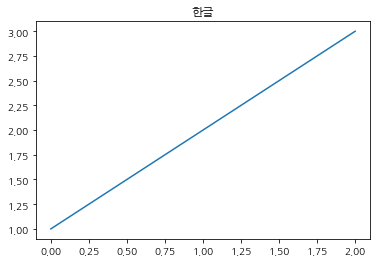

In [ ]:
# 한글폰트 확인하기
pd.Series([1,2,3]).plot(title="한글")

## 한 개의 변수 빈도수 구하고 시각화 하기
* Keyword

    * Series.value_counts()
    * Series.value_counts().plot()
    * Series.value_counts().plot.bar()
    * Series.value_counts().plot.barh()
    * sns.countplot()

### Market

* KOSPI (Korea Composite Stock Price Index) 
    * 우리나라의 종합주가지수(KOSPI)는 증권거래소가 1964.1.4일을 기준시점으로 다우존스식 주가평균을 지수화한 수정주가 평균지수를 산출, 발표하기 시작하였다. 다우존스식 주가지수는 주가지수를 구성하는 상장종목 중 일부 우량주만을 선정하여 산출하는 방식이다. 시가총액식 주가지수는 일정시점의 시가총액과 현재시점의 시가총액을 대비, 현재의 주가수준을 판단하는 방식이다. 즉, 지난 1980년 1월 4일 기준 상장종목 전체의 시가총액을 100으로 보고 현재 상장종목들의 시가총액이 어느 수준에 놓여 있는지를 보여주는 시스템이다.
    * 종합주가지수 = (비교시점의 시가총액 ÷ 기준시점의 시가총액) × 100
    * 출처 : [네이버 지식백과] 종합주가지수 (시사상식사전, pmg 지식엔진연구소) https://terms.naver.com/entry.nhn?docId=72147&cid=43667&categoryId=43667


* KOSDAQ (Korea Securities Dealers Automated Quotation) 
    * 미국의 나스닥(NASDAQ)을 한국식으로 합성한 용어로 1996년 7월 1일 증권업협회와 증권사들이 설립한 코스닥증권(주)에 의하여 개설되었다. 코스닥의 개장으로 단순히 증권거래소 상장을 위한 예비적 단계였던 장외시장이 미국의 나스닥(NASDAQ)과 같이 자금조달 및 투자시장으로 독립적인 역할을 수행하게 되었다. 이후 2005년 1월 유가증권시장, 코스닥시장, 선물시장이 증권선물거래소(현 한국거래소)로 통합됨에 따라 코스닥시장도 거래소가 개설한 정규시장으로 편입되었다. 코스닥은 유가증권시장에 비해 진입요건이 상대적으로 덜 까다롭기 때문에 주로 중소벤처기업들이 상장되어 있다.
    * 출처 : [네이버 지식백과] KOSDAQ (매일경제, 매경닷컴) https://terms.naver.com/entry.nhn?docId=18639&cid=43659&categoryId=43659


* KONEX(Korea New Exchange) : 
    * 일정 요건을 갖춘 비상장 기업에 문호를 개방하기 위해 개설하는 유가증권시장, 코스닥시장에 이은 제3의 주식시장을 일컫는다. 코넥스시장은 우수한 기술력을 보유하고 있음에도 불구하고, 짧은 경력 등을 이유로 자금 조달에 어려움을 겪는 초기 중소기업과 벤처기업이 자금을 원활하게 조달할 수 있도록 하기 위해 설립된 자본시장으로, 2013년 7월 1일 개장되었다. 
    * 출처 : [네이버 지식백과] 코넥스 (시사상식사전, pmg 지식엔진연구소) https://terms.naver.com/entry.nhn?docId=1006691&cid=43667&categoryId=43667

In [ ]:
# Market column에 어떤 데이터들이 있는지 unique로 확인합니다.
df["Market"].unique()

array(['KOSDAQ', 'KOSPI', 'KONEX'], dtype=object)

In [ ]:
# value_counts()로 빈도수를 구합니다.
df["Market"].value_counts()

KOSPI     6380
KOSDAQ    1581
KONEX      123
Name: Market, dtype: int64

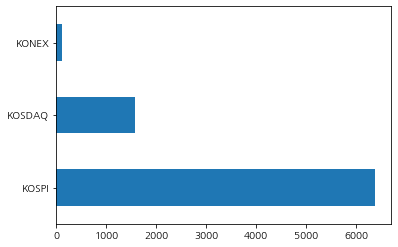

In [ ]:
# 빈도수를 시각화 합니다.
df["Market"].value_counts().plot(kind="barh")

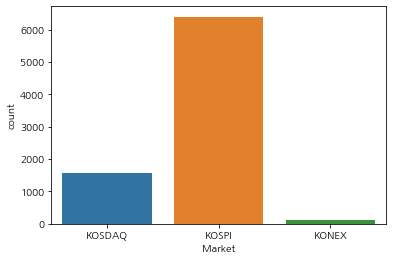

In [ ]:
# Seaborn countplot 활용하여 빈도수를 표현합니다.
sns.countplot(data=df, x="Market")

### Sector

In [ ]:
df["Sector"]

0              전자부품 제조업
1       산업용 기계 및 장비 임대업
2                기타 금융업
3                기타 금융업
4         특수 목적용 기계 제조업
             ...       
8079                NaN
8080                NaN
8081                NaN
8082                NaN
8083      특수 목적용 기계 제조업
Name: Sector, Length: 8084, dtype: object

In [ ]:
# 섹터의 빈도수를 구합니다.
df["Sector"].value_counts()

소프트웨어 개발 및 공급업       152
특수 목적용 기계 제조업        150
전자부품 제조업             127
의약품 제조업               96
자동차 신품 부품 제조업         95
                    ... 
기타 비금속광물 광업            1
의복 액세서리 제조업            1
악기 제조업                 1
인형,장난감 및 오락용품 제조업      1
해체, 선별 및 원료 재생업        1
Name: Sector, Length: 161, dtype: int64

In [ ]:
# 상위 30개 섹터의 빈도수를 sector_count_top 변수에 할당합니다.
# sector_count_top
sector_count_top = df["Sector"].value_counts().head(30)
sector_count_top

소프트웨어 개발 및 공급업                           152
특수 목적용 기계 제조업                            150
전자부품 제조업                                 127
의약품 제조업                                   96
자동차 신품 부품 제조업                             95
기타 금융업                                    92
기타 화학제품 제조업                               91
금융 지원 서비스업                                78
통신 및 방송 장비 제조업                            70
반도체 제조업                                   61
자연과학 및 공학 연구개발업                           59
1차 철강 제조업                                 58
의료용 기기 제조업                                56
플라스틱제품 제조업                                46
일반 목적용 기계 제조업                             45
기초 화학물질 제조업                               42
기초 의약물질 및 생물학적 제제 제조업                     41
컴퓨터 프로그래밍, 시스템 통합 및 관리업                   40
기타 전문 도매업                                 38
전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업         37
기타 식품 제조업                                 34
영화, 비디오물, 방송프로그램 제작 및 배급업                 31
의료용품 및 기타 

In [ ]:
# 표로 나타내기
sector_count_top.to_frame()

,Sector
소프트웨어 개발 및 공급업,152
특수 목적용 기계 제조업,150
전자부품 제조업,127
의약품 제조업,96
자동차 신품 부품 제조업,95
기타 금융업,92
기타 화학제품 제조업,91
금융 지원 서비스업,78
통신 및 방송 장비 제조업,70
반도체 제조업,61


In [ ]:
# 표로 나타내기
sector_count_top.reset_index(name="count")

,index,count
0,소프트웨어 개발 및 공급업,152
1,특수 목적용 기계 제조업,150
2,전자부품 제조업,127
3,의약품 제조업,96
4,자동차 신품 부품 제조업,95
5,기타 금융업,92
6,기타 화학제품 제조업,91
7,금융 지원 서비스업,78
8,통신 및 방송 장비 제조업,70
9,반도체 제조업,61


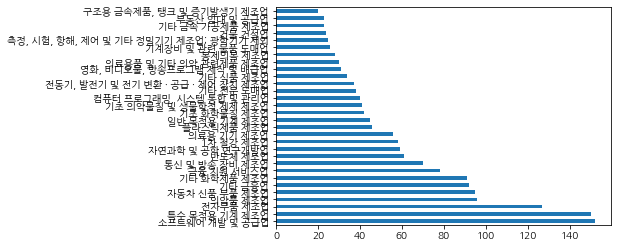

In [ ]:
# 빈도수 표로
sector_count_top.plot(kind="barh")

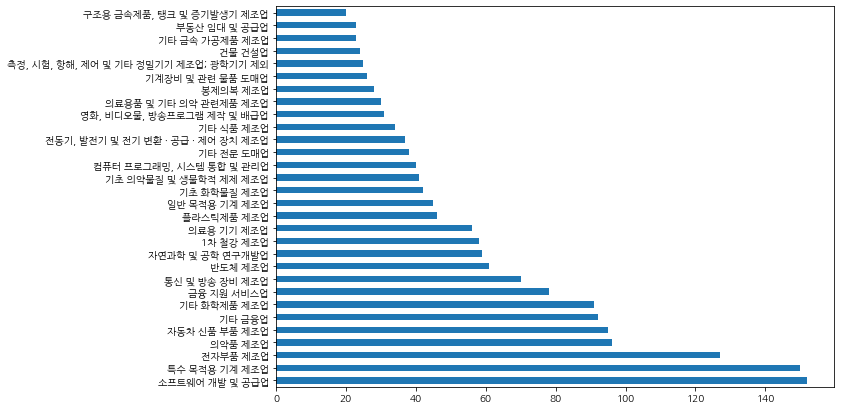

In [ ]:
# 빈도수 표로
sector_count_top.plot.barh(figsize=(10,7))

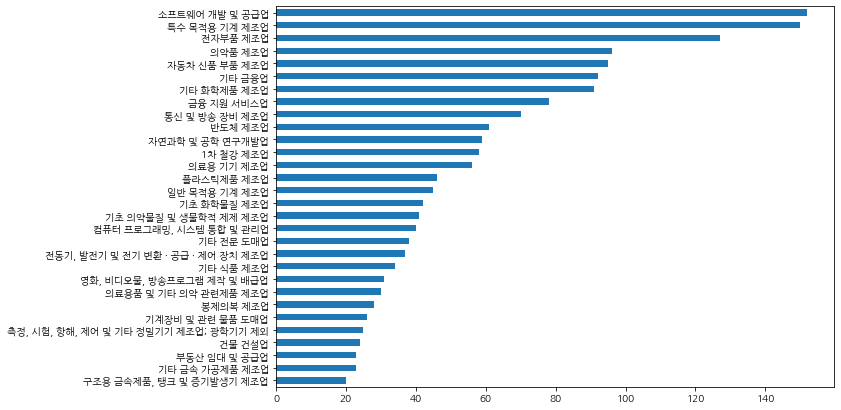

In [ ]:
# 높은 주기대로
sector_count_top.sort_values().plot.barh(figsize=(10,7))

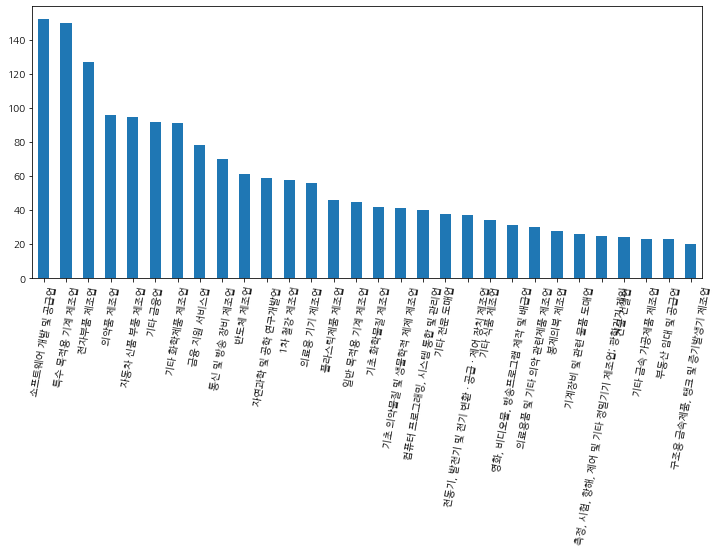

In [ ]:
# x, y 축 반대로
sector_count_top.plot.bar(rot=80, figsize=(12, 5))

In [ ]:
sector_count_top.index

Index(['소프트웨어 개발 및 공급업', '특수 목적용 기계 제조업', '전자부품 제조업', '의약품 제조업',
       '자동차 신품 부품 제조업', '기타 금융업', '기타 화학제품 제조업', '금융 지원 서비스업',
       '통신 및 방송 장비 제조업', '반도체 제조업', '자연과학 및 공학 연구개발업', '1차 철강 제조업',
       '의료용 기기 제조업', '플라스틱제품 제조업', '일반 목적용 기계 제조업', '기초 화학물질 제조업',
       '기초 의약물질 및 생물학적 제제 제조업', '컴퓨터 프로그래밍, 시스템 통합 및 관리업', '기타 전문 도매업',
       '전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업', '기타 식품 제조업',
       '영화, 비디오물, 방송프로그램 제작 및 배급업', '의료용품 및 기타 의약 관련제품 제조업', '봉제의복 제조업',
       '기계장비 및 관련 물품 도매업', '측정, 시험, 항해, 제어 및 기타 정밀기기 제조업; 광학기기 제외', '건물 건설업',
       '기타 금속 가공제품 제조업', '부동산 임대 및 공급업', '구조용 금속제품, 탱크 및 증기발생기 제조업'],
      dtype='object')

In [ ]:
df["Sector"].value_counts()

소프트웨어 개발 및 공급업       152
특수 목적용 기계 제조업        150
전자부품 제조업             127
의약품 제조업               96
자동차 신품 부품 제조업         95
                    ... 
기타 비금속광물 광업            1
의복 액세서리 제조업            1
악기 제조업                 1
인형,장난감 및 오락용품 제조업      1
해체, 선별 및 원료 재생업        1
Name: Sector, Length: 161, dtype: int64

In [ ]:
df[df["Sector"].isin(sector_count_top.index)]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시,2002.0
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시,1999.0
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도,2001.0
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도,2017.0
5,211270,KOSDAQ,AP위성,통신 및 방송 장비 제조업,위성통신 단말기,2016-03-04,12월,류장수,http://www.apsi.co.kr,서울특별시,2016.0
...,...,...,...,...,...,...,...,...,...,...,...
8068,084110,KOSDAQ,휴온스글로벌,의약품 제조업,의약품제조업,2006-12-19,12월,송수영,http://www.huonsglobal.com,경기도,2006.0
8069,145020,KOSDAQ,휴젤,기초 의약물질 및 생물학적 제제 제조업,"보툴리눔톡신, 필러",2015-12-24,12월,손지훈,http://www.hugel.co.kr,강원도,2015.0
8070,024060,KOSDAQ,흥구석유,기타 전문 도매업,휘발유등,1994-12-07,12월,김상우,NaN,대구광역시,1994.0
8071,010240,KOSDAQ,흥국,특수 목적용 기계 제조업,굴삭기 Roller 및 형단조품,2009-05-12,12월,류명준,http://www.heungkuk.co.kr,충청남도,2009.0


In [ ]:
# df_sector_30

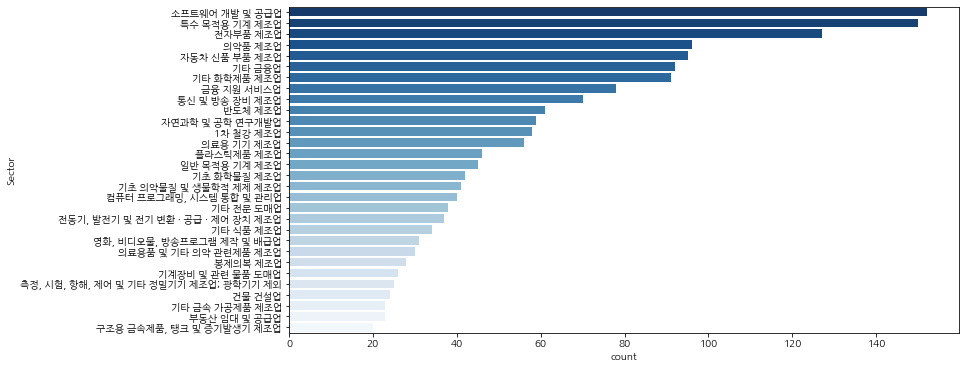

In [ ]:
# Seaborn countplot 활용하여 빈도수를 표현합니다.
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.countplot(data=df[df["Sector"].isin(sector_count_top.index)], 
              y="Sector", 
              order=sector_count_top.index, palette="Blues_r")

In [ ]:
print(plt.colormaps())

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r

In [ ]:
# 빈도수가 가장 많은 데이터 색인하기
df[df["Sector"] =="소프트웨어 개발 및 공급업"]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
118,214270,KOSDAQ,FSN,소프트웨어 개발 및 공급업,카울리,2015-03-25,12월,"이상석, 서정교 (각자 대표이사)",http://fsn.co.kr,서울특별시,2015.0
1615,046440,KOSDAQ,KG모빌리언스,소프트웨어 개발 및 공급업,유무선전화결제서비스,2004-12-14,12월,고규영,http://www.mobilians.co.kr,서울특별시,2004.0
1618,035600,KOSDAQ,KG이니시스,소프트웨어 개발 및 공급업,전자지불서비스,2002-11-22,12월,유승용,http://www.inicis.com,서울특별시,2002.0
1922,181710,KOSPI,NHN,소프트웨어 개발 및 공급업,한게임,2013-08-29,12월,정우진,http://www.nhn.com,경기도,2013.0
1923,104200,KOSDAQ,NHN벅스,소프트웨어 개발 및 공급업,"디지털음원유통, 온라인음악서비스",2009-10-06,12월,왕문주,http://www.bugs.co.kr,경기도,2009.0
...,...,...,...,...,...,...,...,...,...,...,...
7945,054920,KOSDAQ,한컴위드,소프트웨어 개발 및 공급업,전자상거래 보안 솔루션,2001-11-01,12월,"김현수, 송상엽(각자대표)",http://www.hsecure.co.kr,경기도,2001.0
7972,220180,KOSDAQ,핸디소프트,소프트웨어 개발 및 공급업,"EKP, BPM, 네트워크장비",2016-11-24,12월,이준희,http://www.handysoft.co.kr,경기도,2016.0
7998,307950,KOSPI,현대오토에버,소프트웨어 개발 및 공급업,"전산실운영, 시스템구축, 전산장비 납품, SOC/건축 사업",2019-03-28,12월,서정식,http://www.hyundai-autoever.com,서울특별시,2019.0
8004,090850,KOSDAQ,현대이지웰,소프트웨어 개발 및 공급업,선택적복리후생서비스,2013-12-27,12월,장영순,http://www.hyundaiezwel.com,서울특별시,2013.0


In [ ]:
# 색인 == Indexing == [인덱스번호] 파이썬은 인덱스 번호가 0번부터 시작
sector_count_top.index[0]

'소프트웨어 개발 및 공급업'

In [ ]:
df[df["Sector"] == sector_count_top.index[0]]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
118,214270,KOSDAQ,FSN,소프트웨어 개발 및 공급업,카울리,2015-03-25,12월,"이상석, 서정교 (각자 대표이사)",http://fsn.co.kr,서울특별시,2015.0
1615,046440,KOSDAQ,KG모빌리언스,소프트웨어 개발 및 공급업,유무선전화결제서비스,2004-12-14,12월,고규영,http://www.mobilians.co.kr,서울특별시,2004.0
1618,035600,KOSDAQ,KG이니시스,소프트웨어 개발 및 공급업,전자지불서비스,2002-11-22,12월,유승용,http://www.inicis.com,서울특별시,2002.0
1922,181710,KOSPI,NHN,소프트웨어 개발 및 공급업,한게임,2013-08-29,12월,정우진,http://www.nhn.com,경기도,2013.0
1923,104200,KOSDAQ,NHN벅스,소프트웨어 개발 및 공급업,"디지털음원유통, 온라인음악서비스",2009-10-06,12월,왕문주,http://www.bugs.co.kr,경기도,2009.0
...,...,...,...,...,...,...,...,...,...,...,...
7945,054920,KOSDAQ,한컴위드,소프트웨어 개발 및 공급업,전자상거래 보안 솔루션,2001-11-01,12월,"김현수, 송상엽(각자대표)",http://www.hsecure.co.kr,경기도,2001.0
7972,220180,KOSDAQ,핸디소프트,소프트웨어 개발 및 공급업,"EKP, BPM, 네트워크장비",2016-11-24,12월,이준희,http://www.handysoft.co.kr,경기도,2016.0
7998,307950,KOSPI,현대오토에버,소프트웨어 개발 및 공급업,"전산실운영, 시스템구축, 전산장비 납품, SOC/건축 사업",2019-03-28,12월,서정식,http://www.hyundai-autoever.com,서울특별시,2019.0
8004,090850,KOSDAQ,현대이지웰,소프트웨어 개발 및 공급업,선택적복리후생서비스,2013-12-27,12월,장영순,http://www.hyundaiezwel.com,서울특별시,2013.0


### Industry

In [ ]:
#사본을 생성
df["Industry_text"] = df["Industry"]
df.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear,Industry_text
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시,2002.0,반도체 웨이퍼 캐리어
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시,2015.0,"렌탈(파렛트, OA장비, 건설장비)"
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시,1999.0,지주사업
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도,2001.0,인터넷 트래픽 솔루션
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도,2017.0,디스플레이 제조 장비


In [ ]:
df["Industry_text"] = df["Industry"]
df.loc[df["Industry"].notnull() & df["Industry"].str.contains("지주"), "Industry_text"] = "지주회사"
df.loc[df["Industry"].notnull() & df["Industry"].str.contains("의약"), "Industry_text"] = "의약"
df.loc[df["Industry"].notnull() & df["Industry"].str.contains("합병"), "Industry_text"] = "합병"
df.loc[df["Industry"].notnull() & df["Industry"].str.contains("화장품|스킨"), "Industry_text"] = "화장품스킨케어"
df.loc[df["Industry"].notnull() & df["Industry"].str.contains("광고"), "Industry_text"] = "광고"
df.loc[df["Industry"].notnull() & df["Industry"].str.contains("게임"), "Industry_text"] = "게임"

In [ ]:
df["Industry_text"] = df["Industry"]
for ind_name in ["지주", "의약품|바이오|의약", "합병", "화장품|스킨", "광고", "게임", "부동산", "금융|증권|생명보험"]:
    df.loc[df["Industry"].notnull() & df["Industry"].str.contains(ind_name), "Industry_text"] = ind_name

In [ ]:
# 중복을 제외한 유일값의 개수
df["Industry_text"].nunique()

2053

In [ ]:
# Industry 의 빈도수를 구합니다.
# industry_top30 상위 30개
# value_counts() 한개 변수의 빈도수
industry_top30 = df["Industry_text"].value_counts().head(30)
industry_top30

의약품|바이오|의약     97
부동산            82
금융|증권|생명보험     74
화장품|스킨         61
합병             52
지주             40
게임             33
광고             30
-               4
셋톱박스            3
벤처캐피탈           3
건강기능식품          3
자동차부품           3
기업인수            3
도급공사            3
기업인수목적회사        2
백화점             2
플라스틱 필름         2
카지노             2
반도체용 인쇄회로기판     2
손해보험            2
전력변환장치          2
레미콘             2
의료정보시스템         2
주정              2
디지털셋톱박스         2
사료              2
관이음쇠            2
골판지원지           2
줄기세포치료제         2
Name: Industry_text, dtype: int64

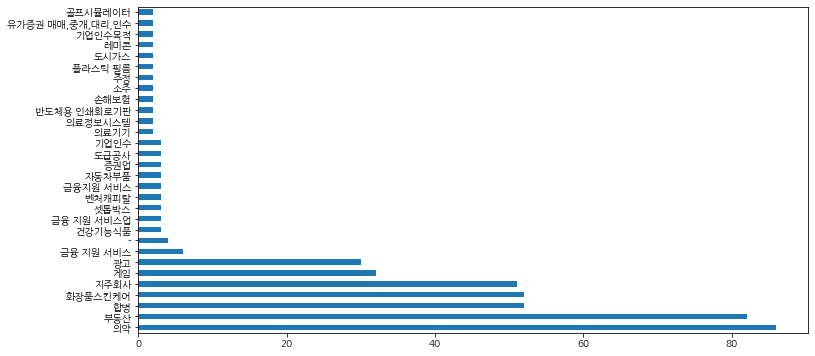

In [ ]:
# Industry 빈도수를 pandas 의 plot 기능을 사용해 시각화 합니다.
industry_top30.plot.barh(figsize=(12,6))

In [ ]:
df_industry_30 = df[df["Industry_text"].isin(industry_top30.index)]

In [ ]:
# df[df["Industry"].isin(industry_top30.index)]

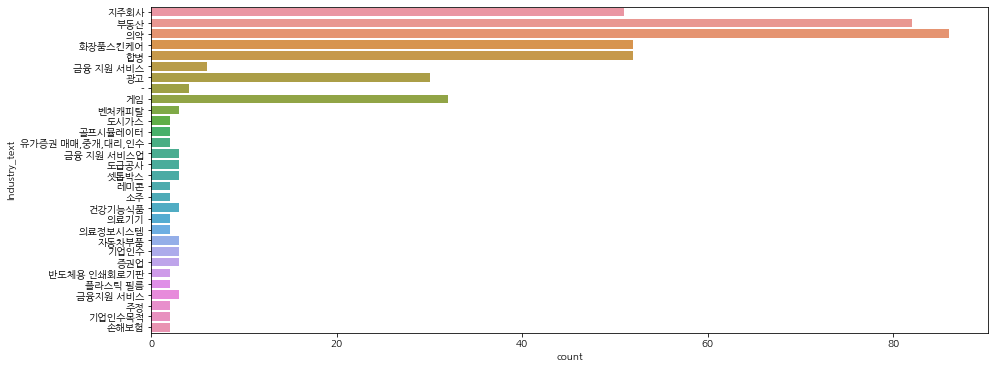

In [ ]:
# seaborn
plt.figure(figsize=(15,6))
sns.countplot(data=df_industry_30, y="Industry_text")

### Region 

In [ ]:
# Region 의 빈도수를 구합니다.
# value_counts()통해 지역별 상장회사의 빈도수를 봅니다.
c

서울특별시      1021
경기도         708
충청남도        100
경상남도         92
인천광역시        89
충청북도         87
부산광역시        76
경상북도         64
대구광역시        53
대전광역시        52
전라북도         29
강원도          26
울산광역시        25
광주광역시        23
전라남도         22
세종특별자치시      10
홍콩            8
제주특별자치도       8
미국            6
케이맨 제도        5
일본            2
싱가포르          1
Name: Region, dtype: int64

In [ ]:
# 많은 순서대로
df["Region"].value_counts().index

Index(['서울특별시', '경기도', '충청남도', '경상남도', '인천광역시', '충청북도', '부산광역시', '경상북도',
       '대구광역시', '대전광역시', '전라북도', '강원도', '울산광역시', '광주광역시', '전라남도', '세종특별자치시',
       '홍콩', '제주특별자치도', '미국', '케이맨 제도', '일본', '싱가포르'],
      dtype='object')

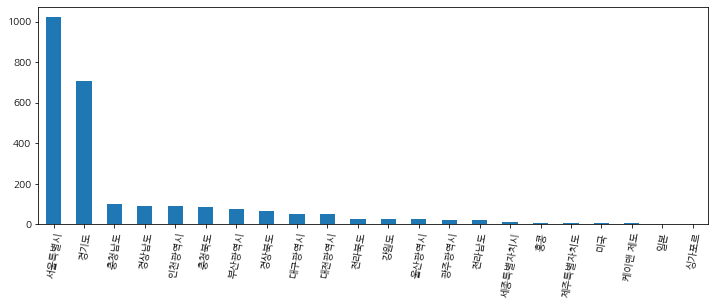

In [ ]:
# df["Region"]
df["Region"].value_counts().plot.bar(figsize=(12,4), rot=80)

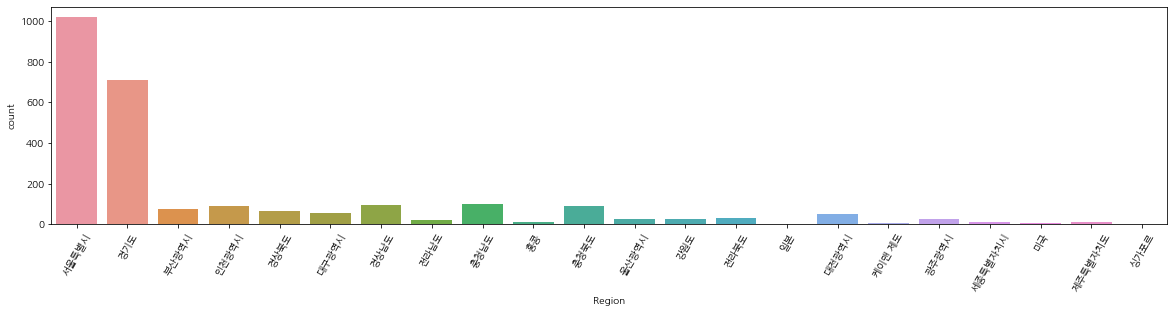

In [ ]:
# Region 의 빈도수를 seaborn 의 countplot 으로 그립니다.
plt.figure(figsize=(20,4))
sns.countplot(data=df, x="Region")
plt.xticks(rotation=60)
plt.show()

In [ ]:
df[df["Region"] == "싱가포르"]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear,Industry_text
6171,950210,KOSPI,프레스티지바이오파마,자연과학 및 공학 연구개발업,바이오시밀러 및 항체의약품 신약,2021-02-05,06월,박소연,http://www.prestigebiopharma.com,싱가포르,2021.0,의약


In [ ]:
# order 기능을 통해 빈도수를 정렬합니다.
# df["Region"].value_counts().index 로 Region 의 순서를 가져와서 지정합니다.


In [ ]:
# Region 을 기준으로 정렬합니다.


## 두 개의 변수 빈도수 구하고 시각화 하기
* crosstab 으로 빈도수 구하기
* seaborn의 countplot 으로 빈도수 시각화
* pandas의 plot 기능으로 시각화
    * lineplot : 연속된 데이터(숫자, 기간)
    * barplot : 비연속 데이터(범주형)
    * hist : 연속된 수치 데이터의 범주화

### 지역별 상장 시장 종목 빈도수 구하기
* pd.crosstab 을 통한 2개의 변수에 대한 빈도수 구하기

In [ ]:
# pd.crosstab 을 통한 2개의 변수에 대한 빈도수 구하기
# Market 과 Region 으로 빈도수 구하기
pd.crosstab(df["Market"],df["Region"])

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,...,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,5,31,1,4,4,1,6,0,2,46,...,0,3,0,3,1,1,5,9,0,0
KOSDAQ,17,530,48,41,10,31,39,6,39,549,...,9,62,2,12,16,2,70,62,4,8
KOSPI,4,147,43,19,9,21,7,0,35,426,...,16,24,0,7,12,5,25,16,1,0


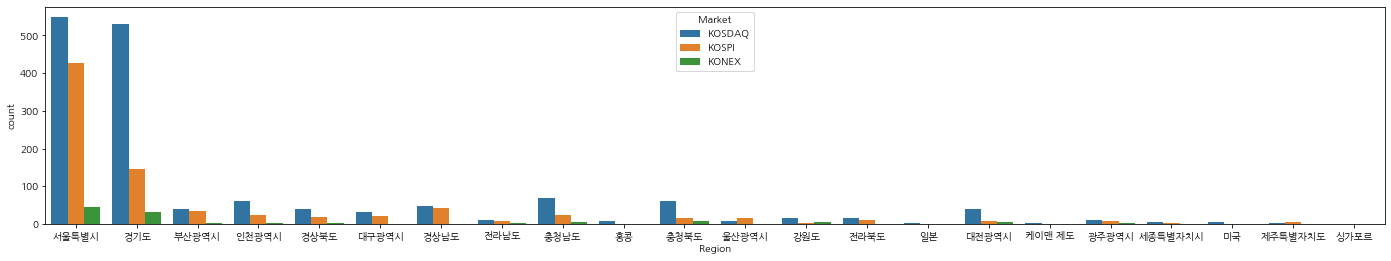

In [ ]:
# countplot : Market 과 Region 으로 빈도수 시각화 하기
import matplotlib.pyplot as plt
plt.figure(figsize=(24,4))
sns.countplot(data=df,x="Region",hue="Market")

### 연도별 상장 종목 빈도수 분석

In [ ]:
df.loc[df["ListingDate"].notnull(), ["Name", "ListingDate", "ListingYear"]]

,Name,ListingDate,ListingYear
0,3S,2002-04-23,2002.0
1,AJ네트웍스,2015-08-21,2015.0
2,AK홀딩스,1999-08-11,1999.0
3,APS홀딩스,2001-12-04,2001.0
4,AP시스템,2017-04-07,2017.0
...,...,...,...
8072,흥국에프엔비,2015-08-07,2015.0
8073,흥국화재,1974-12-05,1974.0
8076,흥아해운,1976-06-29,1976.0
8077,희림,2000-02-03,2000.0


In [ ]:
# Market, ListingYear 빈도수 구하기
# market_year
market_year = pd.crosstab(df["Market"],df["ListingYear"])
market_year

ListingYear,1956.0,1962.0,1964.0,1966.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,11,10,23,20,14,13,12,11,7,2
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,35,58,88,59,68,85,89,86,100,47
KOSPI,5,1,1,1,6,5,4,1,3,22,...,10,9,17,18,20,19,15,14,27,3


In [ ]:
# 컬럼명을 정수 형태로 변경
market_year.columns = market_year.columns.astype(int)
market_year

ListingYear,1956,1962,1964,1966,1968,1969,1970,1971,1972,1973,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,11,10,23,20,14,13,12,11,7,2
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,35,58,88,59,68,85,89,86,100,47
KOSPI,5,1,1,1,6,5,4,1,3,22,...,10,9,17,18,20,19,15,14,27,3


### seaborn을 통한 빈도수 시각화

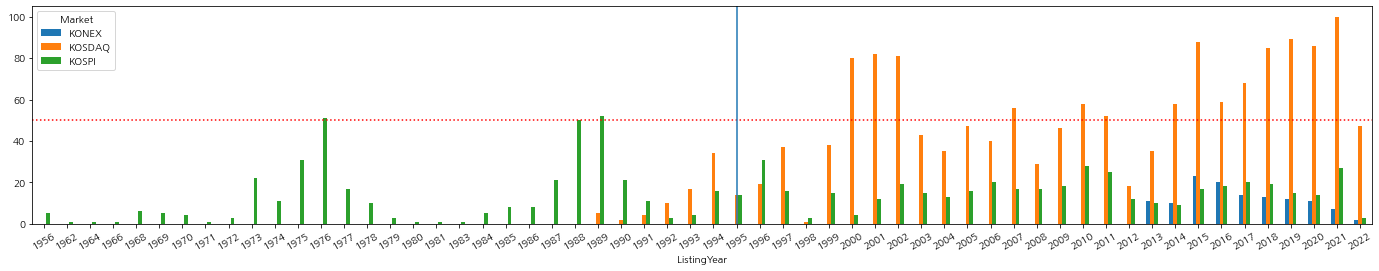

In [ ]:
# T == Transpose 로 행과 열의 축을 변경
market_year.T.plot.bar(figsize=(24,4), rot=30)
plt.axhline(50, c="r", linestyle=":")
plt.axvline(30)

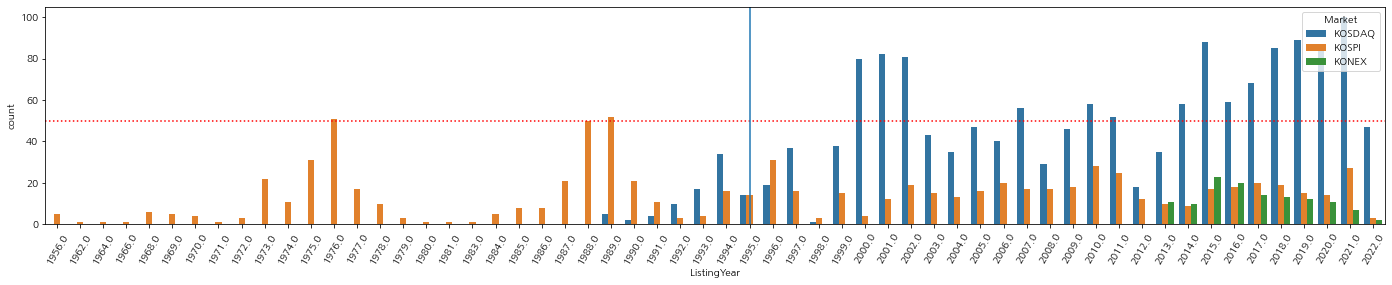

In [ ]:
# Seaborn countplot 활용하여 빈도수를 표현합니다.
# hue 를 사용해 다른 변수를 함께 표현합니다. hue는 색상을 의미합니다.
#ehdnaakf =()괄호 안에서 
plt.figure(figsize=(24,4))
sns.countplot(data=df, x="ListingYear", hue="Market")
plt.axhline(50,c="r", linestyle=":")
plt.axvline(30)
plt.xticks(rotation=60)
plt.show()

### Pandas를 통한 시각화

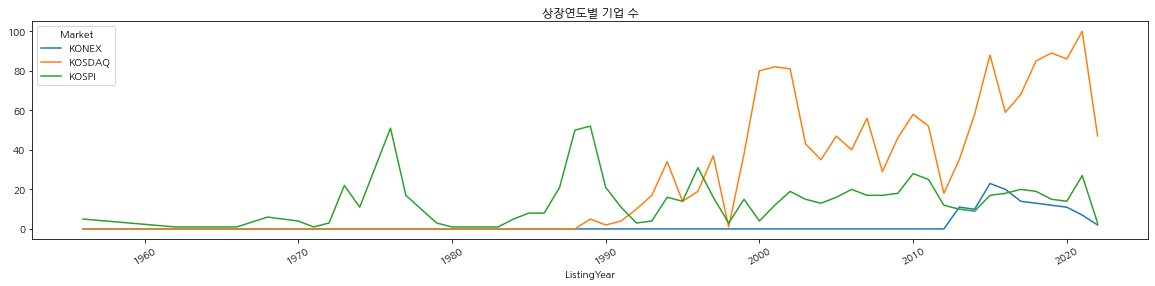

In [ ]:
# Pandas plot 기능 활용하여 기본 그래프(line)를 그립니다.
# Pandas plot으로 그릴 때 x축에 인덱스 값이 y축에는 컬럼에 있는 값이 들어갑니다.
# 컬럼이 여러개라면 다른 색상으로 그려집니다.

market_year.T.plot(figsize=(20,4),rot=30, title="상장연도별 기업 수")

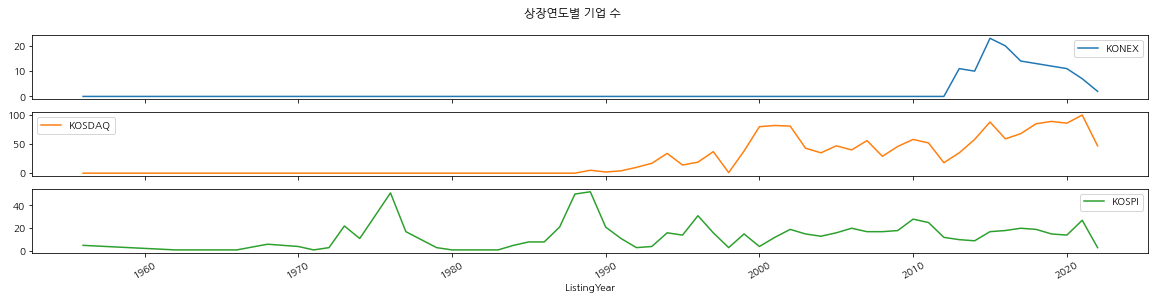

In [ ]:
# 컬럼값을 subplots 으로 그립니다.
market_year.T.plot(figsize=(20,4),rot=30, title="상장연도별 기업 수", subplots=True)
plt.show()

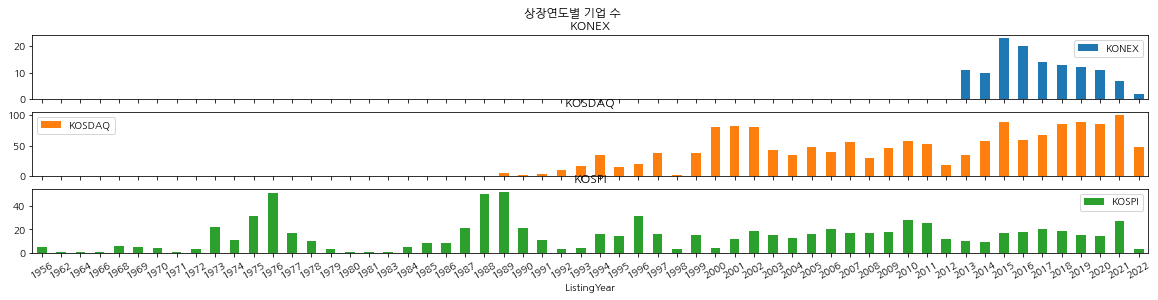

In [ ]:
# Pandas plot 기능 활용하여 막대 그래프(bar, barh)를 그립니다.
market_year.T.plot.bar(figsize=(20,4),rot=30, title="상장연도별 기업 수", subplots=True)
plt.show()

In [ ]:
# 컬럼명의 데이터 타입을 int 형태로 변경합니다.
# market_year.columns
market_year.columns = market_year.columns.astype(int)
market_year

ListingYear,1956,1962,1964,1966,1968,1969,1970,1971,1972,1973,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,11,10,23,20,14,13,12,11,7,2
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,35,58,88,59,68,85,89,86,100,47
KOSPI,5,1,1,1,6,5,4,1,3,22,...,10,9,17,18,20,19,15,14,27,3


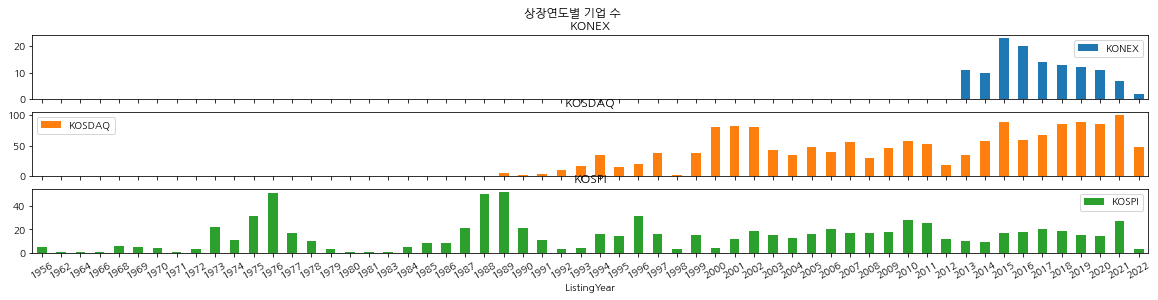

In [ ]:
# 막대(bar)그래프 그리기
# market_year
market_year.T.plot.bar(figsize=(20,4),rot=30, title="상장연도별 기업 수", subplots=True)
plt.show()

### groupby 와 pivot_table로 빈도수 구하기
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/06_valuecounts.svg">

* [How to calculate summary statistics? — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/06_calculate_statistics.html)
* [Group by: split-apply-combine — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)
* [pandas.pivot_table — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html)

In [ ]:
# groupby([인덱스 컬럼 리스트])[연산에 사용할 컬럼].연산()
# unstack() => [인덱스 컬럼 리스트]에서 마지막 인덱스를 컬럼으로 보냄
# market_year

df.groupby(["Market", "ListingYear"])["Symbol"].count().unstack().fillna(0).astype(int)



ListingYear,1956.0,1962.0,1964.0,1966.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,11,10,23,20,14,13,12,11,7,2
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,35,58,88,59,68,85,89,86,100,47
KOSPI,5,1,1,1,6,5,4,1,3,22,...,10,9,17,18,20,19,15,14,27,3


In [ ]:
# 크로스탭의 경우,,
# market_year = pd.crosstab(df["Market"],df["ListingYear"])
# market_year

In [ ]:
market_year.columns = market_year.columns.astype(int)
market_year

In [ ]:
# pivot_table로 같은 결과가 나오게 연산하기
pd.pivot_table(data=df, index="Market", 
               columns="ListingYear", values="Symbol", 
               aggfunc="count").fillna(0).astype(int)

ListingYear,1956.0,1962.0,1964.0,1966.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,11,10,23,20,14,13,12,11,7,2
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,35,58,88,59,68,85,89,86,100,47
KOSPI,5,1,1,1,6,5,4,1,3,22,...,10,9,17,18,20,19,15,14,27,3


In [ ]:
df_market_year = market_year.T


In [ ]:
df_market_year = df.groupby(["Market", "ListingYear"])["Symbol"].count().reset_index(name="count")
df_market_year["ListingYear"] = df_market_year["ListingYear"].astype(int)
df_market_year.head(2)

,Market,ListingYear,count
0,KONEX,2013,11
1,KONEX,2014,10


In [ ]:
plt.style.use("ggplot")

In [ ]:
# 선택할 수 있는 그래프 스타일
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


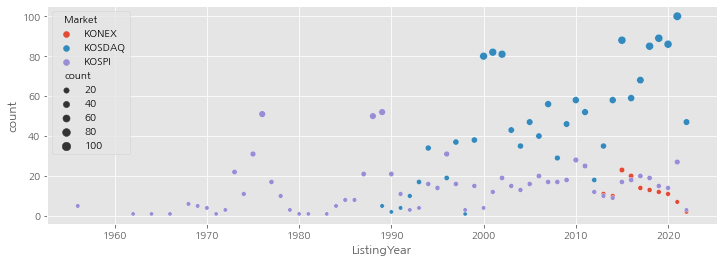

In [ ]:
# 위의 groupby 결과를 scatterplot으로 그립니다.
# df_market_year
plt.figure(figsize=(12,4))
sns.scatterplot(data=df_market_year, x="ListingYear", y="count", hue="Market", size="count")

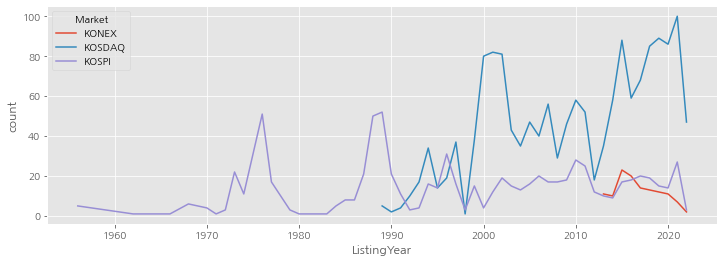

In [ ]:
# lineplot 그리기
plt.figure(figsize=(12,4))
sns.lineplot(data=df_market_year, x="ListingYear", y="count", hue="Market")

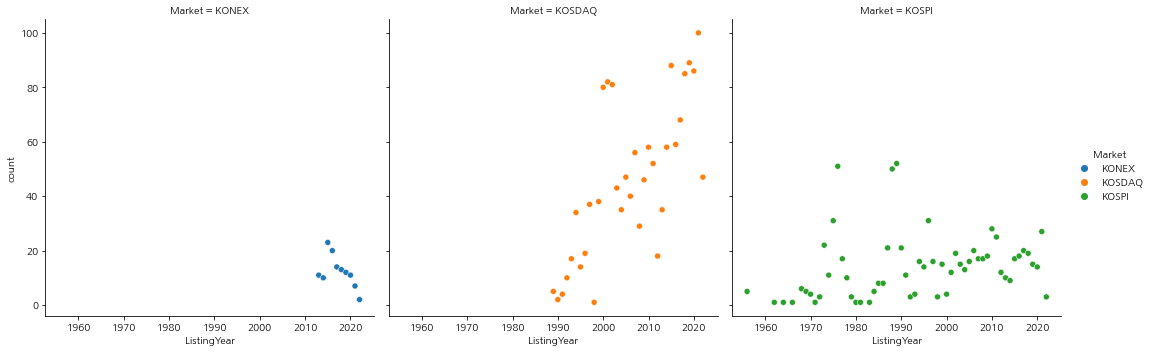

In [ ]:
# relplot으로 subplot 그리기 - scatter
sns.relplot(data=df_market_year, x="ListingYear", y="count", hue="Market", col="Market")

In [ ]:
# relplot으로 subplot 그리기 - line


### 구간화 binnig 과 히스토그램
* 연속된 수치 데이터를 범주형 데이터로 표현, bucketing 이라고 부르기도 함
* 히스토그램 : 도수분포를 그래프 형태로 표현한 것
* 막대그래프와 비슷해 보이지만 다른 그래프
* 참고 : [히스토그램 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%ED%9E%88%EC%8A%A4%ED%86%A0%EA%B7%B8%EB%9E%A8)

In [ ]:
# bins 의 갯수에 따라 그래프의 표현 방법이 달라집니다.


## 데이터 색인

In [ ]:
# 케이맨 제도에 있는 회사 찾기


In [ ]:
# 1970년 이전에 상장한 기업을 찾습니다.


In [ ]:
# and => &
# or  => |
True and True

In [ ]:
# 2020년 상장한 서울특별시에 소재한 코스피 종목을 찾습니다.


### 지역별 섹터

In [ ]:
# Sector, Region 으로 crosstab 연산을 합니다.
# df_sr


### 컬럼과 인덱스 값으로 색인하기

In [ ]:
# 특정 컬럼만 가져오기


### 특정 행만 가져오기

* .loc[행]
* .loc[행, 열]
* .loc[조건식, 열]

In [ ]:
# df_sr에서 "소프트웨어 개발 및 공급업" 행만 가져오기


In [ ]:
# loc 로 행인덱스 가져오기
# 행에서 "소프트웨어 개발 및 공급업", "금융 지원 서비스업", "의약품 제조업" 가져오기


In [ ]:
# loc 로 행, 컬럼 가져오기
# 행에서 "소프트웨어 개발 및 공급업", "금융 지원 서비스업", "의약품 제조업"
# 열에서 "서울특별시" 가져오기



In [ ]:
# loc로 여러 행과 열 가져오기


In [ ]:
# "소프트웨어 개발 및 공급업" 만 가져와서 막대그래프를 그립니다.


In [ ]:
# "의약품 제조업" 만 가져와서 막대그래프를 그립니다.



In [ ]:
# iloc[행]
# iloc[행,열]


In [ ]:
# df.head 혹은 tail도 내부에서 iloc를 슬라이싱으로 사용하고 있습니다.
# df.head??

In [ ]:
# df_sr.tail??